# Project Vaccinated or not

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/h1n1_vaccine_prediction.csv")

In [3]:
df

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26702,26702,2.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
26703,26703,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Rent,Employed,"MSA, Principle City",1.0,0.0,0
26704,26704,2.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Not Married,Own,NaN,"MSA, Not Principle City",0.0,0.0,0
26705,26705,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Employed,Non-MSA,1.0,0.0,0


In [4]:
df.isnull().sum()

unique_id                        0
h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status      

<AxesSubplot:>

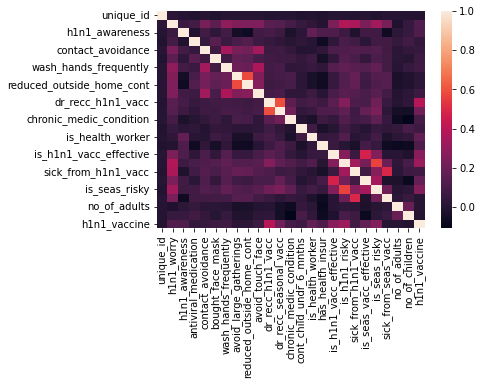

In [5]:
corr=df.corr()
sns.heatmap(corr)

In [6]:
categorical_nan = [feature for feature in df.columns if df[feature].isna().sum()>0 and df[feature].dtypes=='O']
print(categorical_nan)

['qualification', 'income_level', 'marital_status', 'housing_status', 'employment']


In [7]:
for feature in categorical_nan:
    df[feature] = df[feature].fillna('None')
df[categorical_nan].isna().sum()

qualification     0
income_level      0
marital_status    0
housing_status    0
employment        0
dtype: int64

In [8]:
numerical_nan = [feature for feature in df.columns if df[feature].isna().sum()>1 and df[feature].dtypes!='O']
numerical_nan

['h1n1_worry',
 'h1n1_awareness',
 'antiviral_medication',
 'contact_avoidance',
 'bought_face_mask',
 'wash_hands_frequently',
 'avoid_large_gatherings',
 'reduced_outside_home_cont',
 'avoid_touch_face',
 'dr_recc_h1n1_vacc',
 'dr_recc_seasonal_vacc',
 'chronic_medic_condition',
 'cont_child_undr_6_mnths',
 'is_health_worker',
 'has_health_insur',
 'is_h1n1_vacc_effective',
 'is_h1n1_risky',
 'sick_from_h1n1_vacc',
 'is_seas_vacc_effective',
 'is_seas_risky',
 'sick_from_seas_vacc',
 'no_of_adults',
 'no_of_children']

In [9]:
df[numerical_nan].isna().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
no_of_adults                   249
no_of_children                 249
dtype: int64

In [10]:
for feature in numerical_nan:
    median_value=df[feature].median()
    df[feature].fillna(median_value,inplace=True)
    df[numerical_nan].isnull().sum()

In [11]:
df.isnull().sum()

unique_id                    0
h1n1_worry                   0
h1n1_awareness               0
antiviral_medication         0
contact_avoidance            0
bought_face_mask             0
wash_hands_frequently        0
avoid_large_gatherings       0
reduced_outside_home_cont    0
avoid_touch_face             0
dr_recc_h1n1_vacc            0
dr_recc_seasonal_vacc        0
chronic_medic_condition      0
cont_child_undr_6_mnths      0
is_health_worker             0
has_health_insur             0
is_h1n1_vacc_effective       0
is_h1n1_risky                0
sick_from_h1n1_vacc          0
is_seas_vacc_effective       0
is_seas_risky                0
sick_from_seas_vacc          0
age_bracket                  0
qualification                0
race                         0
sex                          0
income_level                 0
marital_status               0
housing_status               0
employment                   0
census_msa                   0
no_of_adults                 0
no_of_ch

In [12]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
for c in df.columns:
    if df[c].dtype=='float16' or  df[c].dtype=='float32' or  df[c].dtype=='float64':
        df[c].fillna(df[c].median())

In [15]:
for f in df.columns:
    if df[f].dtype=='object': 
        lbl = LabelEncoder()
        lbl.fit(list(df[f].values))
        df[f] = lbl.transform(list(df[f].values))

In [16]:
df = pd.get_dummies(df)
X = df.drop(['h1n1_vaccine'], axis=1)
y = df[['h1n1_vaccine']]

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model = model.fit(X_train, y_train)

In [19]:
print(model.coef_)

[[-2.16957254e-07 -1.69554101e-02  2.33743873e-02  2.27015884e-02
  -1.16997122e-02  2.69576829e-02  7.50365514e-03 -1.93173378e-02
  -6.15901026e-03  2.60887076e-03  3.55708809e-01 -6.54722821e-02
   1.50779004e-02  3.30612795e-02  1.26753442e-01  4.90351145e-04
   6.00940565e-02  5.46302489e-02 -1.06408782e-03  1.03245128e-02
   2.01748456e-02 -1.12452461e-02  1.47743628e-02  1.86919307e-04
   6.90205136e-03  1.34838797e-02  6.16772054e-03 -9.58362351e-03
  -8.47758068e-03  1.18334622e-03  4.92744286e-03 -3.82234367e-03
  -4.82369276e-03]]


In [20]:
print(model.intercept_)

[-0.32511569]


In [21]:
y_pred = model.predict(X_test)
print(y_pred)

[[ 0.10657414]
 [ 0.07423571]
 [ 0.67186413]
 ...
 [ 0.01256085]
 [ 0.16609637]
 [-0.01475695]]


In [22]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(r2)


0.26917877309788785


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('Mean Squared Error:', mean_squared_error(y_test, y_pred)) 
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))

Mean Squared Error: 0.12196536221649645
Root Mean Squared Error: 0.349235396568699
Mean Absolute Error: 0.2594594053370879
